In [81]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.datasets import mnist

# 이미 훈련과 테스트가 분리된 데이터임
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [82]:
# 데이터의 크기 확인
# 28X28X1 = 흑백데이터다~
print("train",x_train.shape,y_train.shape)
print("test",x_test.shape,y_test.shape)

train (60000, 28, 28) (60000,)
test (10000, 28, 28) (10000,)


In [83]:

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# 크기변경
# x_train = x_train.reshape(60000, 28 * 28)
# x_test = x_test.reshape(10000, 28 * 28)

In [84]:
# y의 클래스 보기
a,b = np.unique(y_train,return_counts=1)
# print(np.unique(y_train,return_counts=1))
print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [85]:
# 이미지 시각화
import matplotlib.pyplot as plt
# plt.imshow(x_train[0],"gray")

In [86]:
# 모델
rate = 0.2
model = Sequential([
    # 5X5 이미지 채널 1개 
    # 필터 = output 노드수 
    # 자르는 필터는 2X2 사이즈 
   
    Dense(64,input_shape=(28,28),activation="relu"),
    Dense(32,activation="relu"),
    Dense(16,activation="relu"),
    # flatten 으로 1차원변환
    Flatten(),
    Dense(10,activation="softmax")
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 28, 64)            1856      
                                                                 
 dense_33 (Dense)            (None, 28, 32)            2080      
                                                                 
 dense_34 (Dense)            (None, 28, 16)            528       
                                                                 
 flatten_3 (Flatten)         (None, 448)               0         
                                                                 
 dense_35 (Dense)            (None, 10)                4490      
                                                                 
Total params: 8,954
Trainable params: 8,954
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["acc"])

In [88]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

earlyStopping = EarlyStopping(monitor="val_loss",
                              mode="min",patience =10,
                              # True 면 좋았던 웨이트로 복원됨
                              # False 면 마지막 웨이트로 놔둠..
                              restore_best_weights=True,
                              verbose=1                              
                              )
# 모델체크포인트는 가장 낮은 val_loss 가 갱신 될 떄 마다 저장합니다.

mcp = ModelCheckpoint(
    monitor="val_loss",
    mode="auto",
    save_best_only=True,
    filepath= "mnlist.h5",
    verbose=1 
)
                    

hist = model.fit(
                x_train,
                y_train,
                epochs=8,
                batch_size=64,
                validation_split=0.2,
                verbose=1,
                callbacks = [earlyStopping,mcp],      
                )

Epoch 1/8
739/750 [============================>.] - ETA: 0s - loss: 1.9542 - acc: 0.7293
Epoch 00001: val_loss improved from inf to 0.36650, saving model to mnlist.h5
750/750 [==============================] - 3s 4ms/step - loss: 1.9311 - acc: 0.7316 - val_loss: 0.3665 - val_acc: 0.8919
Epoch 2/8
745/750 [============================>.] - ETA: 0s - loss: 0.3163 - acc: 0.9043
Epoch 00002: val_loss improved from 0.36650 to 0.24893, saving model to mnlist.h5
750/750 [==============================] - 3s 3ms/step - loss: 0.3156 - acc: 0.9046 - val_loss: 0.2489 - val_acc: 0.9273
Epoch 3/8
739/750 [============================>.] - ETA: 0s - loss: 0.2378 - acc: 0.9287
Epoch 00003: val_loss improved from 0.24893 to 0.21963, saving model to mnlist.h5
750/750 [==============================] - 3s 3ms/step - loss: 0.2374 - acc: 0.9287 - val_loss: 0.2196 - val_acc: 0.9343
Epoch 4/8
730/750 [============================>.] - ETA: 0s - loss: 0.2052 - acc: 0.9372
Epoch 00004: val_loss improved from

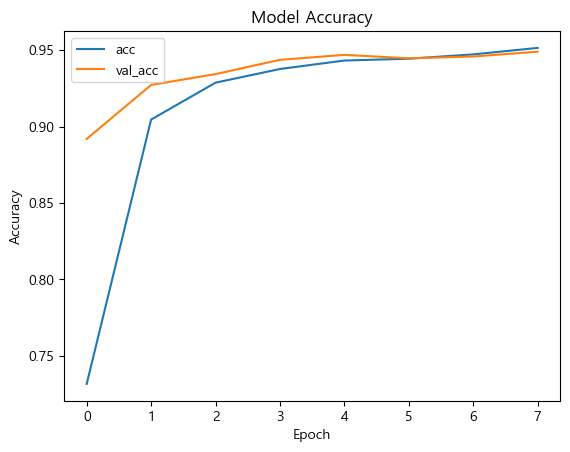

In [89]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

In [90]:
loss,acc = model.evaluate(x_test,y_test)
print("loss : ",loss)
print("acc : ",acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.1669 - acc: 0.9502
loss :  0.16690880060195923
acc :  0.9502000212669373
